In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load data from a CSV file into a pandas DataFrame named 'df'

df = pd.read_csv("data_cardiovascular_risk.csv")

In [ ]:
# Display the first 5 rows of the DataFrame 'df'

df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# Retrieve the dimensions (number of rows, number of columns) of the DataFrame 'df'.

df.shape

(3390, 17)

In [ ]:
# Display a concise summary of the DataFrame 'df', including data types, non-null values, and memory usage.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
# Generate descriptive statistics for the numerical columns in the DataFrame 'df'.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.75,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0


In [ ]:
# Removing the columns not having any significance with target variable

df = df.drop(['id','education'],axis=1)

In [ ]:
df.shape

(3390, 15)

In [ ]:
# Checking numerical/categorical veriables count

obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer/Float variables:",len(num_cols))

Categorical variables: 2
Integer/Float variables: 5


In [ ]:
# Checking the count of each unique value

df['sex'].value_counts()

sex
F    1923
M    1467
Name: count, dtype: int64

In [ ]:
df['is_smoking'].value_counts()

is_smoking
NO     1703
YES    1687
Name: count, dtype: int64

In [ ]:
# Convert categorical to numeric

df['is_smoking'] = np.where(df['is_smoking']=='YES',1,0)

In [ ]:
df['is_smoking'].value_counts()

is_smoking
0    1703
1    1687
Name: count, dtype: int64

In [ ]:
# Convert categorical to numeric

df['sex'] = np.where(df['sex']=='F',1,0)

In [ ]:
df['sex'].value_counts()

sex
1    1923
0    1467
Name: count, dtype: int64

In [ ]:
df.head(2)

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,1,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   sex              3390 non-null   int64  
 2   is_smoking       3390 non-null   int64  
 3   cigsPerDay       3368 non-null   float64
 4   BPMeds           3346 non-null   float64
 5   prevalentStroke  3390 non-null   int64  
 6   prevalentHyp     3390 non-null   int64  
 7   diabetes         3390 non-null   int64  
 8   totChol          3352 non-null   float64
 9   sysBP            3390 non-null   float64
 10  diaBP            3390 non-null   float64
 11  BMI              3376 non-null   float64
 12  heartRate        3389 non-null   float64
 13  glucose          3086 non-null   float64
 14  TenYearCHD       3390 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 397.4 KB


In [ ]:
# Count the number of missing values in each column of the DataFrame 'df'.

df.isnull().sum()

age                  0
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
# Identify duplicate rows in the DataFrame 'df' and printing it

df.duplicated().sum()

0

In [ ]:
# Percentage of missing values in each column of the DataFrame

df.isnull().sum()/len(df)*100

age                0.000000
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.648968
BPMeds             1.297935
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.120944
sysBP              0.000000
diaBP              0.000000
BMI                0.412979
heartRate          0.029499
glucose            8.967552
TenYearCHD         0.000000
dtype: float64

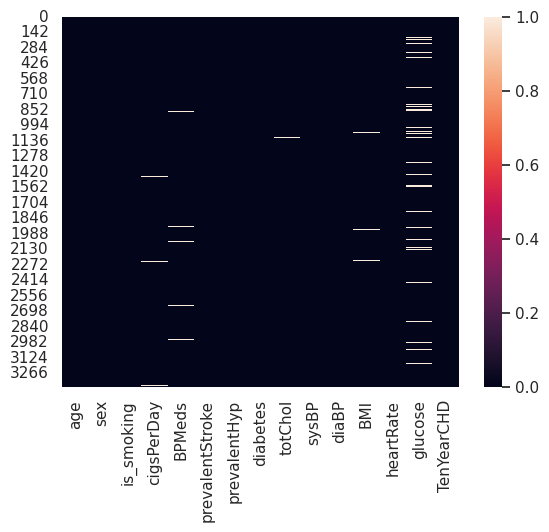

In [ ]:
# Heatmap displaying columns having null values

sns.heatmap(df.isnull())
plt.show()

In [ ]:
df[df['heartRate'].isnull()]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1388,64,0,1,18.0,0.0,0,1,0,219.0,172.5,75.0,29.29,NaN,91.0,1


In [ ]:
# Dropping null values from column 'heartRate'

df.dropna(subset=['heartRate'], inplace=True)

In [ ]:
# Treating missing values using mean method

df.fillna(df.mean(), inplace=True)

In [ ]:
# # Treating missing values using KNN Imputer

# from sklearn.impute import KNNImputer
# imputer = KNNImputer()
# df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
# print(df_imputed.head())

In [ ]:
df.isnull().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

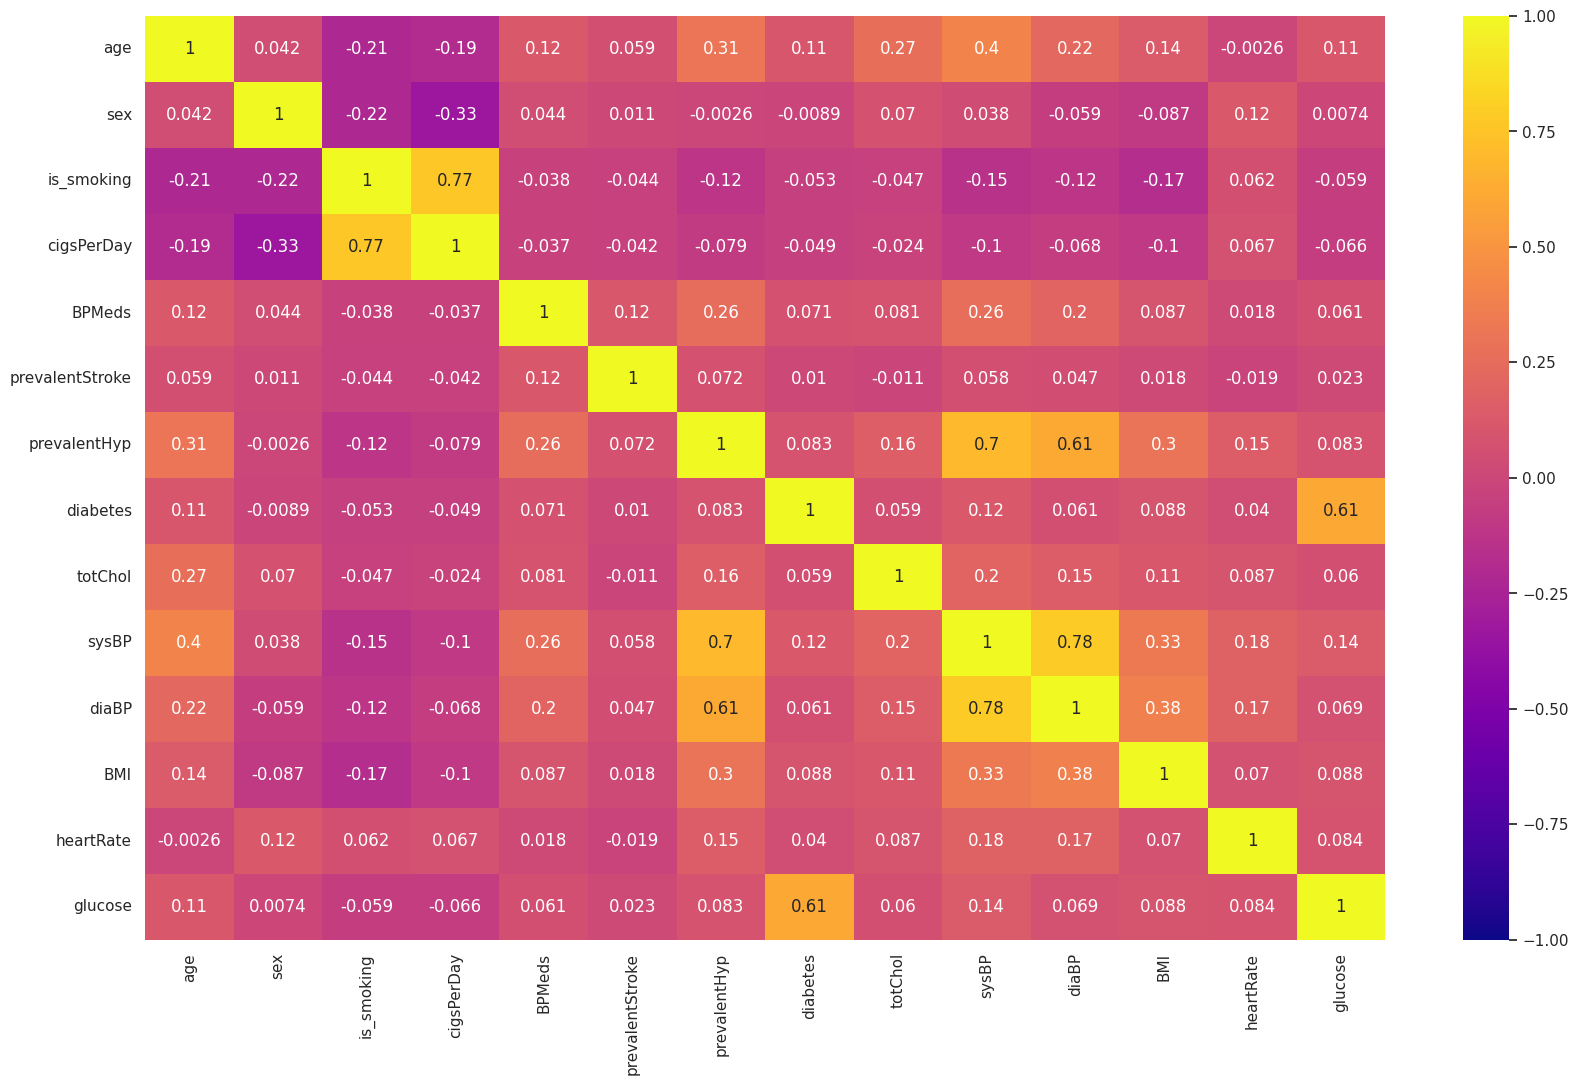

In [ ]:
# This visualization is useful for understanding the relationships between different features in the dataset.
# High positive correlations (close to 1) indicate strong positive linear relationships, while high negative correlations (close to -1)
# indicate strong negative linear relationships. A correlation coefficient close to 0 suggests no linear relationship between the variables.

plt.figure(figsize=(20,12))
cor_matrix = df.drop('TenYearCHD', axis=1).corr()
sns.heatmap(cor_matrix, cmap='plasma',vmin=-1, vmax=1 , annot = True)
plt.show()

In [ ]:
# Dropping cigsPerDay column since is_smoking and cigsPerDay have high correlation and has same effect on target variable

df.drop('cigsPerDay',axis=1,inplace=True)

# Bivariate Analysis


<Axes: xlabel='sex', ylabel='TenYearCHD'>

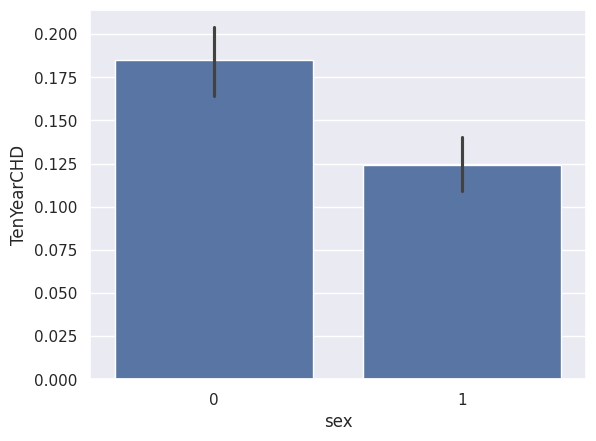

In [ ]:
# Males are more prone to CHD

sns.barplot(x="sex",y="TenYearCHD",data=df)

<Axes: xlabel='is_smoking', ylabel='TenYearCHD'>

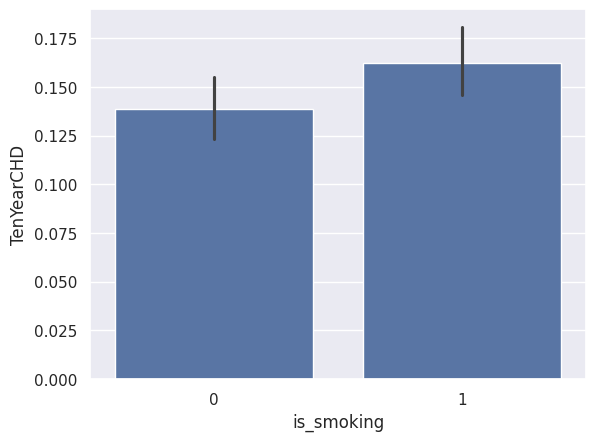

In [ ]:
# Smokers having more chances of having CHD

sns.barplot(x="is_smoking",y="TenYearCHD",data=df)

<Axes: xlabel='age', ylabel='TenYearCHD'>

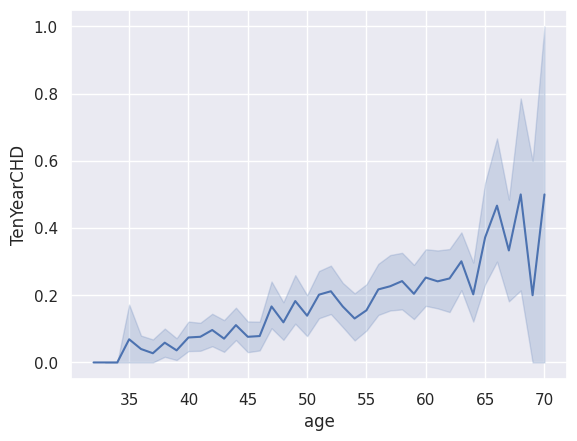

In [ ]:
# With increasing age there are more chances of having CHD

sns.lineplot(x="age", y="TenYearCHD", data=df)

<Axes: xlabel='age', ylabel='glucose'>

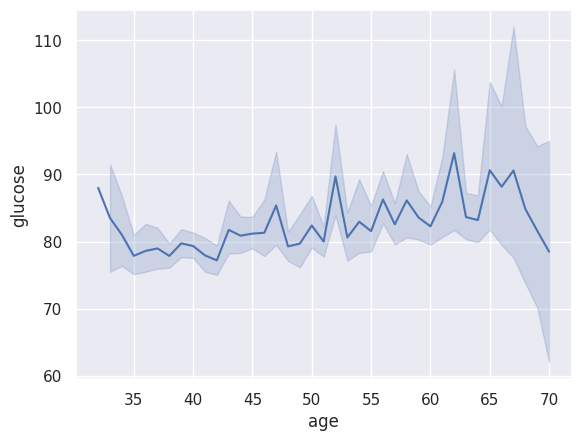

In [ ]:
# # With increasing age Glucose level is at a higher scale

sns.lineplot(x="age", y="glucose", data=df)

<Axes: xlabel='age', ylabel='is_smoking'>

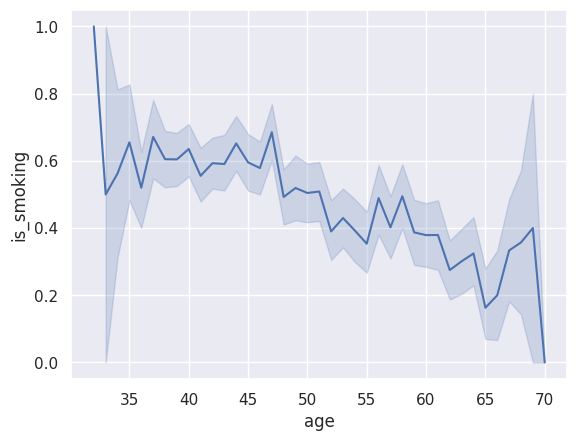

In [ ]:
# Young people are

sns.lineplot(x="age", y="is_smoking", data=df)

In [ ]:
# Excluding target variable

cols = list(df.iloc[:, :-1])
print(cols)

len(cols)

['age', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


13

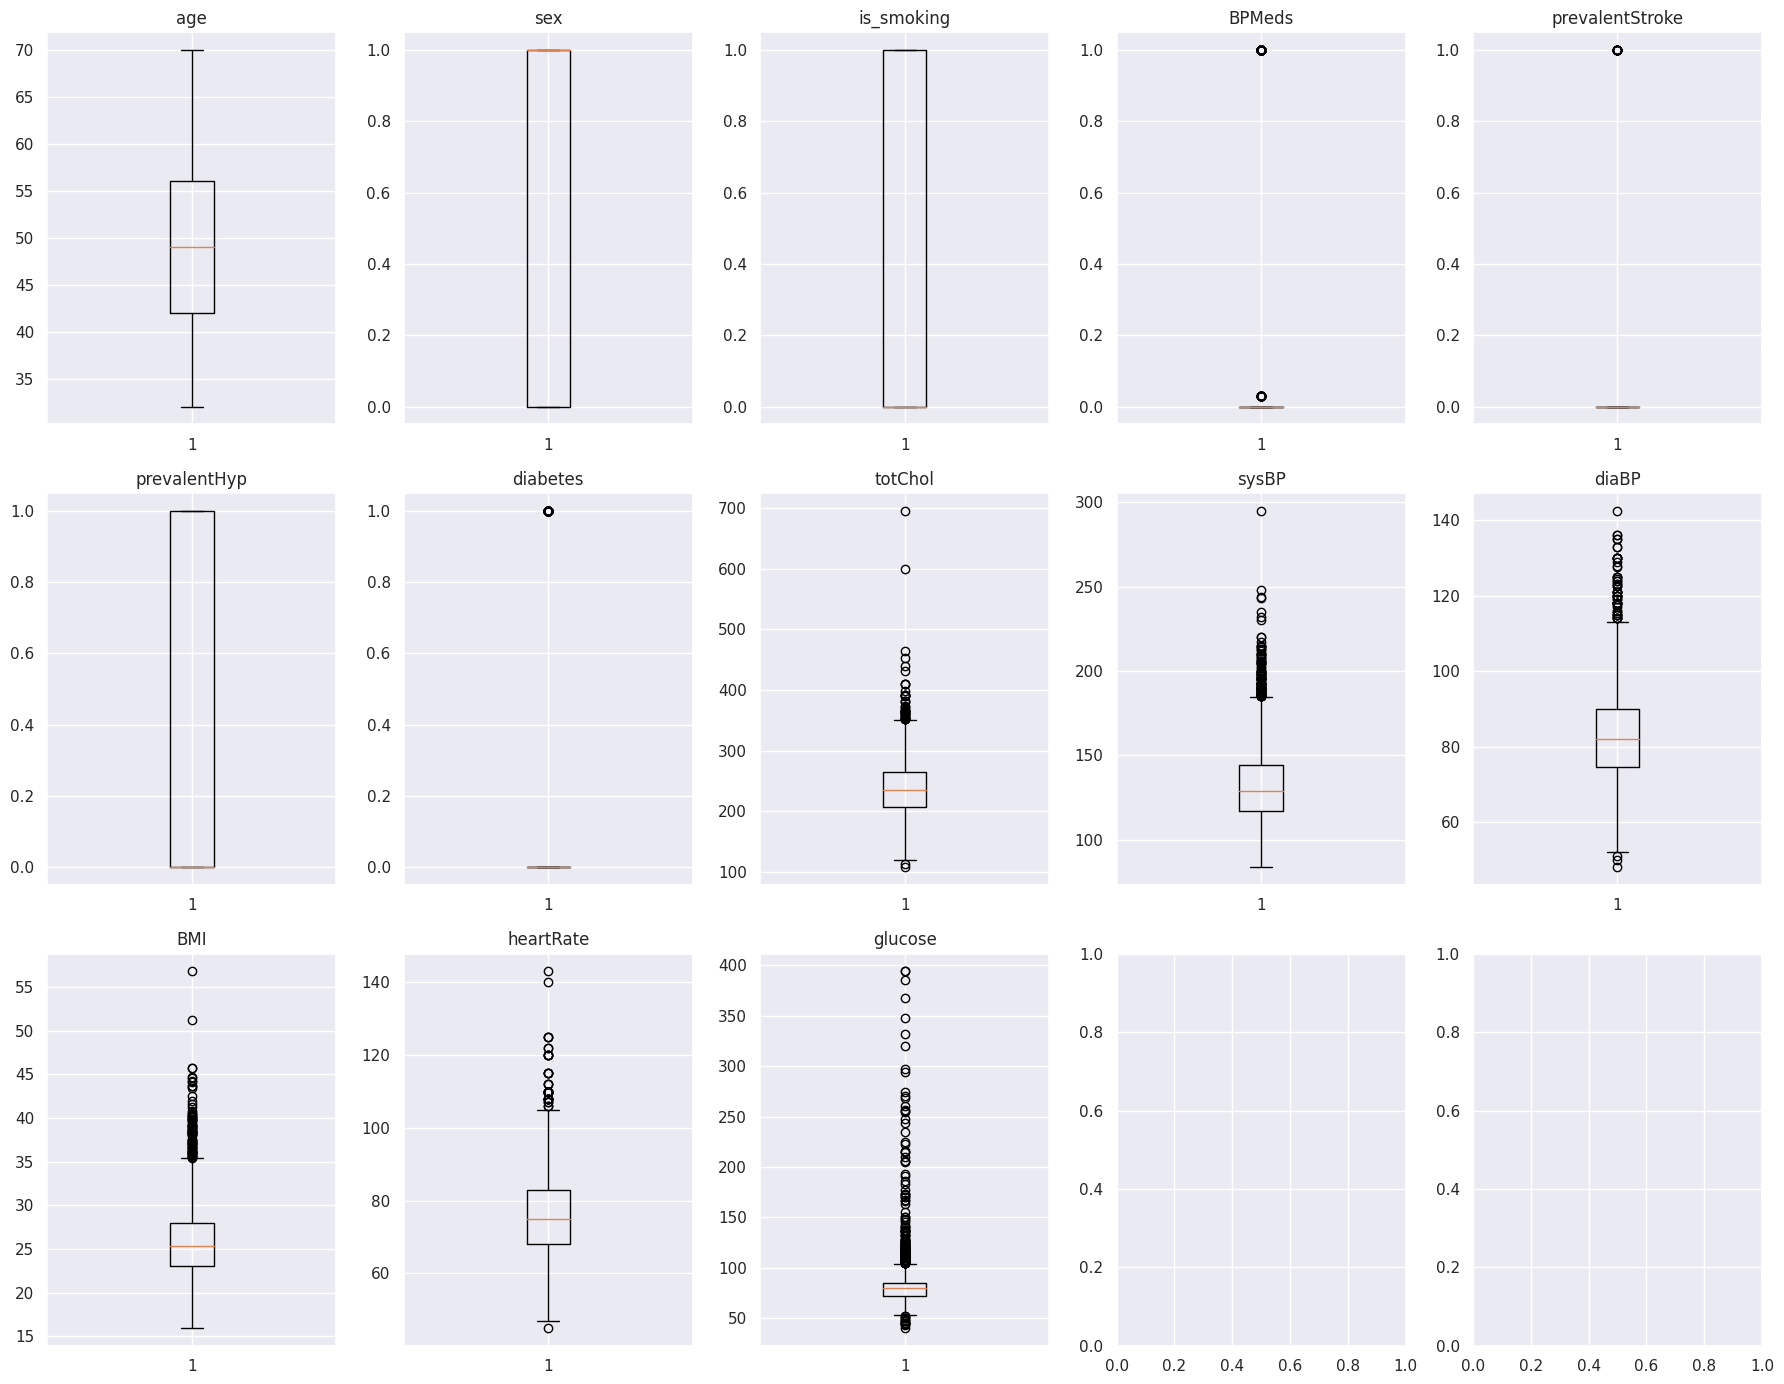

In [ ]:
# Checking on outliers

f,ax=plt.subplots(3,5,figsize=(18,14),dpi=100)

ind=0
try:
    for i in range(3):
        for j in range(5):
            ax[i,j].boxplot(x=df[cols[ind]])
            ax[i,j].set_title(cols[ind])
            ind+=1
        plt.tight_layout()
except:
    pass
plt.show()

In [ ]:
# Calculate skewness for each feature
from scipy import stats
skew_values = df.skew().sort_values(ascending=False)

# Print skewness values and identify skewed features
print("Skewness Values:")
print(skew_values)


Skewness Values:
prevalentStroke    12.295764
glucose             6.439474
diabetes            6.001020
BPMeds              5.559597
TenYearCHD          1.955922
sysBP               1.177224
BMI                 1.025120
totChol             0.945535
prevalentHyp        0.796196
diaBP               0.717706
heartRate           0.676490
age                 0.226129
is_smoking          0.010037
sex                -0.272303
dtype: float64


# Splitting Data into Dependent and Independent Variable

In [ ]:
# excluding Target

x = df.iloc[:, :-1]

# Taking Target variable as y

y = df['TenYearCHD']

In [ ]:
x.head()

,age,sex,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,64,1,1,0.0,0,0,0,221.0,148.0,85.0,25.793929,90.0,80.0
1,36,0,0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0
2,46,1,1,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0
3,50,0,1,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0
4,64,1,1,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0


In [ ]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [ ]:
#Splitting into Train and Test

x_train , x_test , y_train , y_test = train_test_split(x, y,test_size=0.2,random_state=42)

In [ ]:
# Calculate the percentage distribution of classes in the y_train set to identify class imbalance

y_train.value_counts() * 100 / len(x_train)

TenYearCHD
0    85.09775
1    14.90225
Name: count, dtype: float64

In [ ]:
y_train.value_counts()

TenYearCHD
0    2307
1     404
Name: count, dtype: int64

<Axes: xlabel='TenYearCHD', ylabel='count'>

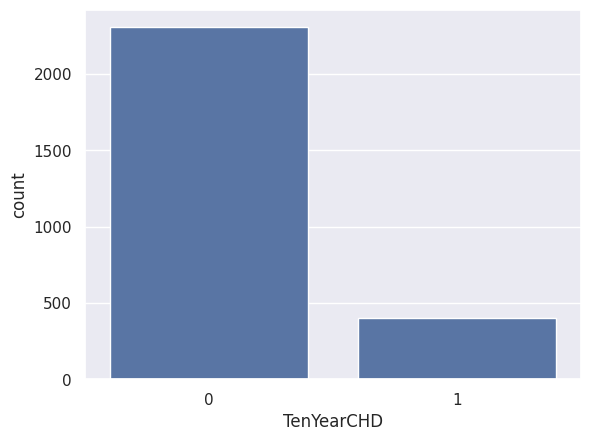

In [ ]:
# Plot the count of each unique value in y_train using seaborn's countplot

sns.countplot(x=y_train,data=df)

In [ ]:
# Applying smote to treat imbalance data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [ ]:
y_train_resampled.value_counts()

TenYearCHD
0    2307
1    2307
Name: count, dtype: int64

In [ ]:
# Building Logistic Regression Model

logit_model = LogisticRegression(solver='liblinear')
logit_model.fit(x_train_resampled, y_train_resampled)

LogisticRegression(solver='liblinear')

In [ ]:
# Use the trained logistic regression model 'logit_model' to predict the target variable for the training set 'x_train'.

y_pred_train = logit_model.predict(x_train_resampled)

# # Use the trained logistic regression model 'logit_model' to predict the target variable for the testing set 'x_test'.

y_pred_test = logit_model.predict(x_test)

In [ ]:
def model_report(model):
    # Use the provided model to predict the target variable for the training set.
    model_pred_train = model.predict(x_train_resampled)

    # Use the provided model to predict the target variable for the testing set.
    model_pred_test = model.predict(x_test)

    # Print the classification report for the predictions on the training set.
    print("Classification Report Train: ")
    print(classification_report(y_train_resampled, model_pred_train))

    # Print the classification report for the predictions on the testing set.
    print("Classification Report Test: ")
    print(classification_report(y_test, model_pred_test))

    # Print the accuracy score for the predictions on the training set.
    print("Accuracy Score Train: ", accuracy_score(y_train_resampled,model_pred_train))

    # Print the accuracy score for the predictions on the testing set.
    print("Accuracy Score Test: ", accuracy_score(y_test,model_pred_test))

    # Print the confusion matrix for the predictions on the training set.
    print("Confusion Matrix Train: ")
    print(confusion_matrix(y_train_resampled,model_pred_train))

    # Print the confusion matrix for the predictions on the testing set.
    print("Confusion Matrix Test: ")
    print(confusion_matrix(y_test,model_pred_test))

In [ ]:
model_report(logit_model)

Classification Report Train: 
              precision    recall  f1-score   support

           0       0.73      0.71      0.72      2307
           1       0.72      0.74      0.73      2307

    accuracy                           0.73      4614
   macro avg       0.73      0.73      0.73      4614
weighted avg       0.73      0.73      0.73      4614

Classification Report Test: 
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       572
           1       0.24      0.42      0.31       106

    accuracy                           0.70       678
   macro avg       0.56      0.59      0.56       678
weighted avg       0.78      0.70      0.73       678

Accuracy Score Train:  0.7267013437364542
Accuracy Score Test:  0.700589970501475
Confusion Matrix Train: 
[[1647  660]
 [ 601 1706]]
Confusion Matrix Test: 
[[430 142]
 [ 61  45]]


In [ ]:
# Building Random Forest Model

rf = RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8,min_samples_split=5)
rf.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_split=5,
                       n_estimators=500)

In [ ]:
# Use the trained Random Forest model 'rf' to predict the target variable for the training set 'x_train'.

y_pred_train = rf.predict(x_train_resampled)

# Use the trained Random Forest model 'rf' to predict the target variable for the test set 'x_test'.

y_pred_test = rf.predict(x_test)

In [ ]:
model_report(rf)

Classification Report Train: 
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      2307
           1       0.85      0.84      0.84      2307

    accuracy                           0.84      4614
   macro avg       0.84      0.84      0.84      4614
weighted avg       0.84      0.84      0.84      4614

Classification Report Test: 
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       572
           1       0.29      0.35      0.32       106

    accuracy                           0.76       678
   macro avg       0.58      0.59      0.59       678
weighted avg       0.78      0.76      0.77       678

Accuracy Score Train:  0.8446033810143043
Accuracy Score Test:  0.7640117994100295
Confusion Matrix Train: 
[[1958  349]
 [ 368 1939]]
Confusion Matrix Test: 
[[481  91]
 [ 69  37]]


In [ ]:
from sklearn.svm import SVC
svm_clf = SVC(C=12,kernel='poly')
svm_clf.fit(x_train_resampled, y_train_resampled)

SVC(C=12, kernel='poly')

In [ ]:
model_report(svm_clf)

Classification Report Train: 
              precision    recall  f1-score   support

           0       0.68      0.74      0.71      2307
           1       0.72      0.66      0.69      2307

    accuracy                           0.70      4614
   macro avg       0.70      0.70      0.70      4614
weighted avg       0.70      0.70      0.70      4614

Classification Report Test: 
              precision    recall  f1-score   support

           0       0.89      0.78      0.84       572
           1       0.30      0.49      0.37       106

    accuracy                           0.74       678
   macro avg       0.59      0.64      0.60       678
weighted avg       0.80      0.74      0.76       678

Accuracy Score Train:  0.699826614651062
Accuracy Score Test:  0.7389380530973452
Confusion Matrix Train: 
[[1707  600]
 [ 785 1522]]
Confusion Matrix Test: 
[[449 123]
 [ 54  52]]


In [ ]:
# using cross validation approach to check overfitting
from sklearn.model_selection import cross_val_score
training = cross_val_score(svm_clf,x_train_resampled, y_train_resampled, cv=10)
print("All 10 accuracy", training)
print("Avg Training Acc", training.mean())
print("Max Training Acc", training.max())

All 10 accuracy [0.65584416 0.67965368 0.69480519 0.71861472 0.68112798 0.70715835
 0.72234273 0.67895879 0.68112798 0.68763557]
Avg Training Acc 0.6907269158896058
Max Training Acc 0.7223427331887202


In [ ]:
# Initialize an XGBoost classifier
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
model_report(model)

Classification Report Train: 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2307
           1       1.00      0.99      0.99      2307

    accuracy                           1.00      4614
   macro avg       1.00      1.00      1.00      4614
weighted avg       1.00      1.00      1.00      4614

Classification Report Test: 
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       572
           1       0.29      0.18      0.22       106

    accuracy                           0.80       678
   macro avg       0.57      0.55      0.55       678
weighted avg       0.77      0.80      0.78       678

Accuracy Score Train:  0.9950151712180321
Accuracy Score Test:  0.8023598820058997
Confusion Matrix Train: 
[[2303    4]
 [  19 2288]]
Confusion Matrix Test: 
[[525  47]
 [ 87  19]]


In [ ]:
# Ensemble methods
# Voting
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=1)
model2 = DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(x_train_resampled,y_train_resampled)
model.score(x_test,y_test)

0.7861356932153393

In [ ]:
# Implementing Stacking with the final layer being logistic regression
from sklearn.ensemble import StackingClassifier

decisiontree =  DecisionTreeClassifier()
randomforest = RandomForestClassifier()
knn =  KNeighborsClassifier()
xgb = XGBClassifier()

#list of the estimator

classificationres = [('decisiontree',decisiontree),('randomforest',randomforest),('knn',knn),('xgb',xgb)]

# Logistic Regression

lr = LogisticRegression()
stack_model = StackingClassifier( estimators = classificationres,final_estimator = lr)

# Fit the stacking model with training data
stack_model.fit(x_train_resampled, y_train_resampled)

score = cross_val_score(stack_model,x_test, y_test,cv = 5,scoring = 'accuracy')

# Printing the final accuracy of the stacked model

print("The accuracy score is:",score.mean())

The accuracy score is: 0.8436601307189543


In [ ]:
x_train_resampled.columns

Index(['age', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

# Taking Stacking classifier as our model for prediction




In [ ]:
# User input function
def predict_cvd():
    # Get user input
    age = float(input("Enter age: "))
    sex = int(input("Enter sex (1 for female, 0 for male): "))
    is_smoking = int(input("Is the person smoking? (0 for no, 1 for yes): "))
    b_pmeds = int(input("Is the person on blood pressure medications? (0 for no, 1 for yes): "))
    prevalent_stroke = int(input("Has the person had a prevalent stroke? (0 for no, 1 for yes): "))
    prevalent_hyp = int(input("Has the person had prevalent hypertension? (0 for no, 1 for yes): "))
    diabetes = int(input("Does the person have diabetes? (0 for no, 1 for yes): "))
    tot_chol = float(input("Enter total cholesterol level: "))
    sys_bp = float(input("Enter systolic blood pressure: "))
    dia_bp = float(input("Enter diastolic blood pressure: "))
    bmi = float(input("Enter BMI: "))
    heart_rate = float(input("Enter heart rate: "))
    glucose = float(input("Enter glucose level: "))

    # Convert user input into a numpy array for prediction
    user_input = np.array([[age, sex, is_smoking, b_pmeds, prevalent_stroke, prevalent_hyp,
                            diabetes, tot_chol, sys_bp, dia_bp, bmi, heart_rate, glucose]])

    # Make prediction using the trained model
    prediction = stack_model.predict(user_input)

    # Interpret the prediction
    if prediction == 1:
        print("The person is predicted to have cardiovascular disease (CVD).")
    else:
        print("The person is predicted to be normal without CVD.")

# Call the user input function for prediction
predict_cvd()

Enter age: 40
Enter sex (1 for female, 0 for male): 0
Is the person smoking? (0 for no, 1 for yes): 1
Is the person on blood pressure medications? (0 for no, 1 for yes): 1
Has the person had a prevalent stroke? (0 for no, 1 for yes): 1
Has the person had prevalent hypertension? (0 for no, 1 for yes): 1
Does the person have diabetes? (0 for no, 1 for yes): 1
Enter total cholesterol level: 300
Enter systolic blood pressure: 180
Enter diastolic blood pressure: 110
Enter BMI: 24
Enter heart rate: 100
Enter glucose level: 200
The person is predicted to have cardiovascular disease (CVD).
